<a href="https://colab.research.google.com/github/saurtripathi/DS/blob/main/Traffic_Sign_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

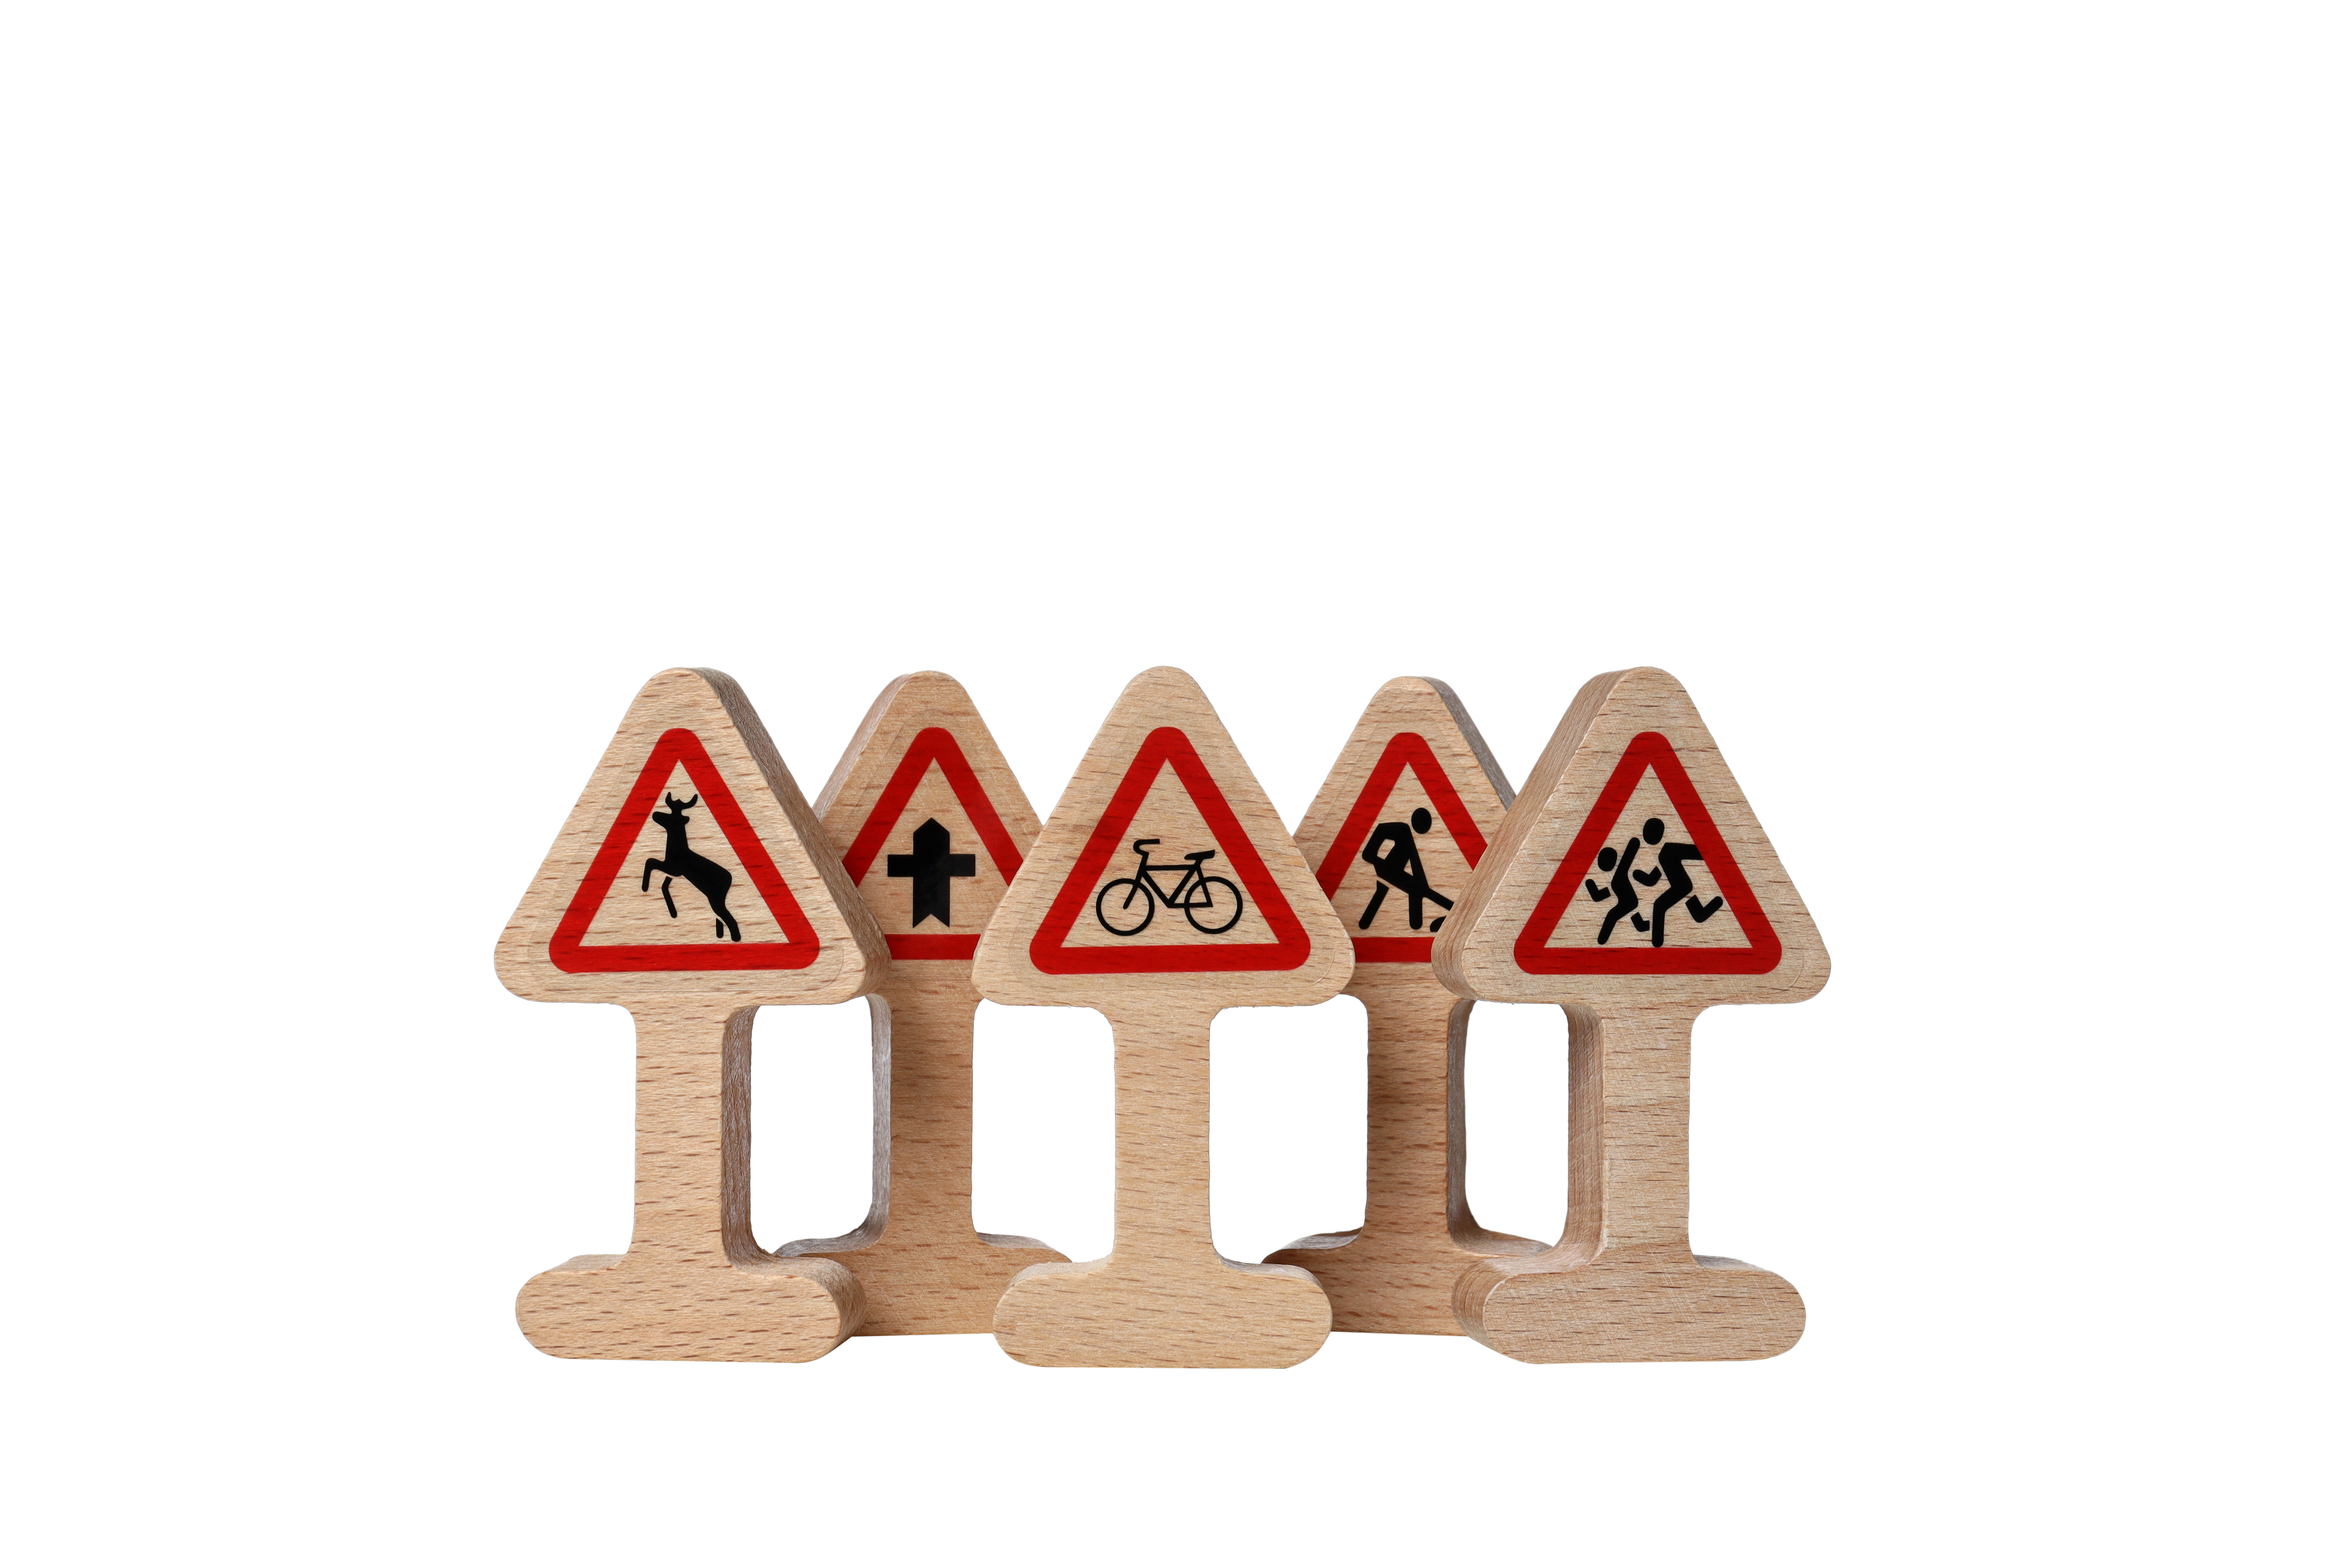

In [3]:
# Banner Image
from IPython.display import Image
Image("/content/Traffic_sign_v1.jpg", width=1400,height=600)


#Table of Contents
*   [Loading Dataset (Traffic Signs Images)](#cell-id-3)
*   [Download and Imports](#cell-id-1)
*   [Functions](#cell-id-2)
*   [Data Splitting and conversion](#cell-id-4)
*   [Creating and Compiling the Model](#cell-id-5)
*   [Training the Model](#cell-id-6)
*   [Visualizing the performance of the Model during Training Phase](#cell-id-7)
*   [Loading Test Dataset and Evaluating the Model](#cell-id-8)
*   [Saving the Model](#cell-id-9)
*   [Training the Model](#cell-id-10)

<a name="cell-id-3"></a>
# Loading Dataset (Traffic Signs Images)

In [ ]:
# Upload kaggle api key kaggle.json in colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('gtsrb-german-traffic-sign.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

<a name="cell-id-1"></a>
# Download and Imports

In [ ]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
# Imports to read and display images
import cv2
from PIL import Image

In [ ]:
# Deep learning Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# imports related to Machine learning library Sci-kit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<a name='cell-id-4'></a>
# Data Splitting and conversion

In [ ]:
# Separately storing the images and labels associated to them in numpy array
# data and labels respectively.
# Setting variables for later use

data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Operation to fetch images and labels from train directory and its sub-directories

for i in range(classes):
    path = os.path.join('/content/','train',str(i))
    images = os.listdir(path)

    for a in images:
      try:
        image = Image.open(path + '/'+ a)
        image = image.resize((30,30))
        image = np.array(image)
        data.append(image)
        labels.append(i)
      except:
        print("Error loading image")
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)

(31367, 30, 30, 3) (31367,)


In [ ]:
print(X_test.shape,y_test.shape)

(7842, 30, 30, 3) (7842,)


<a name='cell-id-5'></a>
# Creating and Compiling the Model


In [ ]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(30,30,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(43,activation='softmax'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,971 (706.92 KB)

 Trainable params: 180,971 (706.92 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

<a name='cell-id-6'></a>
# Training the Model

In [ ]:
import tensorflow
with tensorflow.device('/device:GPU:0'):
  history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.4989 - loss: 2.2649 - val_accuracy: 0.8991 - val_loss: 0.3884
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9356 - loss: 0.2476 - val_accuracy: 0.9519 - val_loss: 0.2176
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9595 - loss: 0.1513 - val_accuracy: 0.9690 - val_loss: 0.1295
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9659 - loss: 0.1291 - val_accuracy: 0.9719 - val_loss: 0.1062
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9749 - loss: 0.1001 - val_accuracy: 0.9676 - val_loss: 0.1282
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.9750 - loss: 0.1025 - val_accuracy: 0.9814 - val_loss: 0.0840
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9785 - loss: 0.0846 - val_accuracy: 0.9739 - val_loss: 0.1109
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9809 - loss: 0.0848 - 

<a name='cell-id-7' ></a>
# Visualizing the performance of the Model during Training Phase


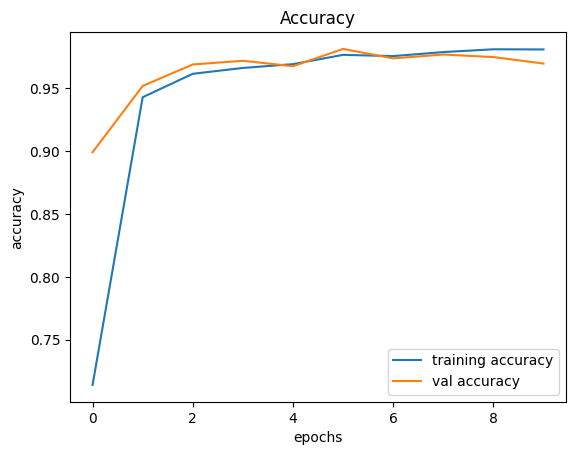

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

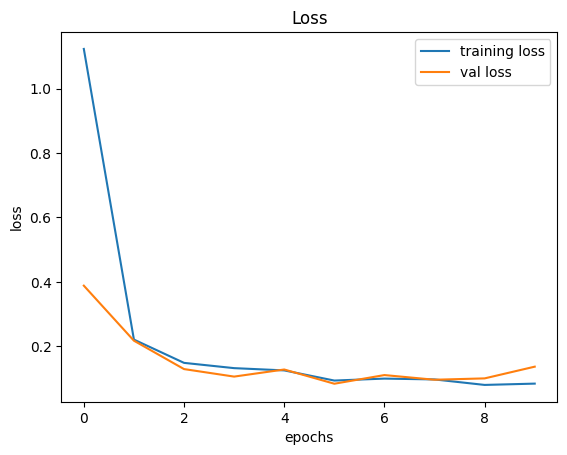

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

<a name='cell-id-8' ></a>
# Loading Test Dataset and Evaluating the Model

In [ ]:
test_data = pd.read_csv('/content/Test.csv')
test_data.head()
y = test_data['ClassId'].values
images = test_data['Path'].values

In [ ]:
image_test = images[1239]
img = Image.open(image_test).resize((30,30))
img = np.array(img)

In [ ]:
img.shape

(30, 30, 3)

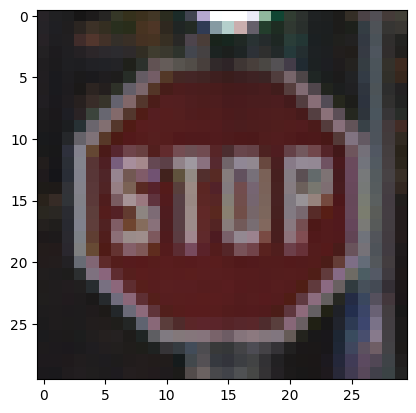

In [ ]:
plt.imshow(img)

In [ ]:
test_input=img.reshape((1,30,30,3))

In [ ]:
test_input.shape

(1, 30, 30, 3)

In [ ]:
np.argmax(model.predict(test_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


np.int64(14)

In [ ]:
test_data[test_data['ClassId']==14]

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
93       100      97       8       8      92      88       14  Test/00093.png
111       62      62       6       6      56      57       14  Test/00111.png
132       36      35       6       5      31      30       14  Test/00132.png
167       38      37       6       5      32      32       14  Test/00167.png
224      115     117      10      10     105     107       14  Test/00224.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12242     39      39       5       6      33      33       14  Test/12242.png
12313     59      59       6       5      54      54       14  Test/12313.png
12460     42      41       5       5      37      36       14  Test/12460.png
12505     39      39       5       5      34      34       14  Test/12505.png
12533     29      46       6       5      24      41       14  Test/12533.png

[270 rows x 8 columns]

In [ ]:
test_data[test_data['ClassId']==14].iloc[135,:].Path

'Test/05899.png'

In [ ]:
img_t = Image.open(test_data[test_data['ClassId']==14].iloc[135,:].Path).resize((30,30))
img_t = np.array(img)

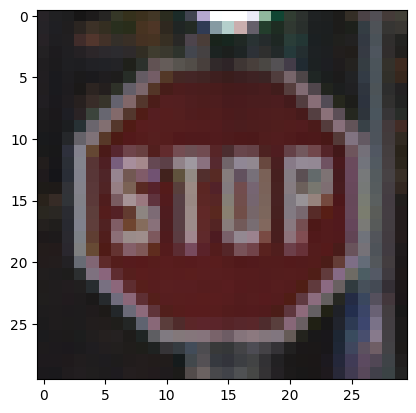

In [ ]:
plt.imshow(img_t)

<a name='cell-id-9' ></a>
# Saving the Model

<a name='' >

<a name='cell-id-10' ></a>
# Training the Model